# Probability distributions, random variables

---

This notebook illustrates the following concepts using simple scripts and functions from `Scipy` and `Numpy` packages.

- Random variables
- Law of the large number
- Expected value
- Discrete probability distributions
- Concitinuous probability distributions
- Moments, variance, and other properties of probability distributions

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Throwing dice many times (illustrating the _Law of large numbers_)
When we throw dice a large number of times, the average reaches 3.5 which is the expected value.

In [3]:
dice = [x for x in range(1,7)]
dice

[1, 2, 3, 4, 5, 6]

In [4]:
print("A fair dice has 6 faces:",dice)

A fair dice has 6 faces: [1, 2, 3, 4, 5, 6]


In [5]:
def throw_dice(n=10):
    """
    Throw a (fair) die n number of times and returns the result in an array
    """
    r = []
    for _ in range(n):
        r.append(random.choice(dice))
    return np.array(r)

In [12]:
throw_dice(10)

array([3, 3, 3, 3, 6, 4, 2, 3, 2, 5])

In [ ]:
throw_dice(6)

In [13]:
for i in [1,5,10,50,100,500,1000,5000,10000]:
    print("Average of {} dice throws: {}".format(i,round(throw_dice(i).mean(),2)))

Average of 1 dice throws: 2.0
Average of 5 dice throws: 4.6
Average of 10 dice throws: 3.1
Average of 50 dice throws: 3.94
Average of 100 dice throws: 3.01
Average of 500 dice throws: 3.44
Average of 1000 dice throws: 3.54
Average of 5000 dice throws: 3.5
Average of 10000 dice throws: 3.47


|$i\in\{1...6\}$|1|2|3|4|5|6|T|
|-------------|-|-|-|-|-|-|-|
|$P(X=i)$|1/6|1/6|1/6|1/6|1/6|1/6|1|
|$i\times P(X=i)$|1/6|2/6|3/6|4/6|5/6|6/6|$E(X)=\dfrac{21}{6}=\dfrac{7}{2}=3.5$|

---

## Expected value of a continuous function

__Expected value or mean__: the weighted average of the possible values, using their probabilities as their weights; or the continuous analog thereof.

Let $X$ be a random variable with a finite number of finite outcomes $x_1$,$x_2$,$x_3$,... occurring with probabilities $p_1$,$p_2$,$p_3$,... respectively. The expectation of $X$ is, then, defined as

$$ E[X]=\sum_{i=1}^{k}x_{i}\,p_{i}=x_{1}p_{1}+x_{2}p_{2}+\cdots +x_{k}p_{k} $$

Since, all the probabilities $p_1$, $p_2$, $p_3$, add up to 1, $p_1+p_2+p_3+...=1$, it is the **weighted average**.

For, continuous probability distributions, with a density function (PDF) of $f(x)$, the expected value is given by,

$$ {\displaystyle \operatorname {E} [X]=\int _{\mathbb {R} }xf(x)\,dx.}$$

### Let's calculate the expected value of the function $P(x)=x.e^{-x}$ between $x=0$ and $x=\infty$

We are trying to compute,
$$ \int _{0}^{\infty}x.P(x).dx = \int _{0}^{\infty}x.[x.e^{-x}].dx = \int _{0}^{\infty}x^2.e^{-x}.dx$$

In [14]:
def func(x):
    import numpy as np
    return x*np.exp(-x)

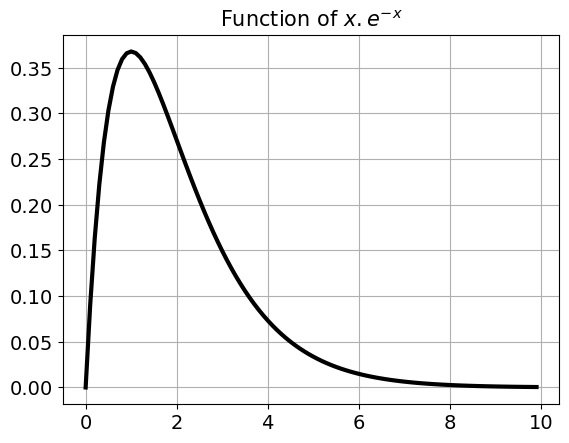

In [15]:
x = np.arange(0,10,0.1)
y = func(x)
plt.plot(x,y,color='k',lw=3)
plt.title("Function of $x.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Use `scipy.integrate` module
We will increase the upper limit of the integral slowly and show that the integral does not change much after a while.

In [16]:
import scipy.integrate

In [17]:
integral_value=[]
for i in range(1,11):
    integral=scipy.integrate.quad(func,0,i)[0]
    integral_value.append(integral)
    print("The integral value for upper limit of {} is : {}".format(i,integral))

The integral value for upper limit of 1 is : 0.2642411176571154
The integral value for upper limit of 2 is : 0.593994150290162
The integral value for upper limit of 3 is : 0.8008517265285442
The integral value for upper limit of 4 is : 0.9084218055563291
The integral value for upper limit of 5 is : 0.9595723180054871
The integral value for upper limit of 6 is : 0.9826487347633355
The integral value for upper limit of 7 is : 0.9927049442755638
The integral value for upper limit of 8 is : 0.9969808363488774
The integral value for upper limit of 9 is : 0.9987659019591333
The integral value for upper limit of 10 is : 0.9995006007726127


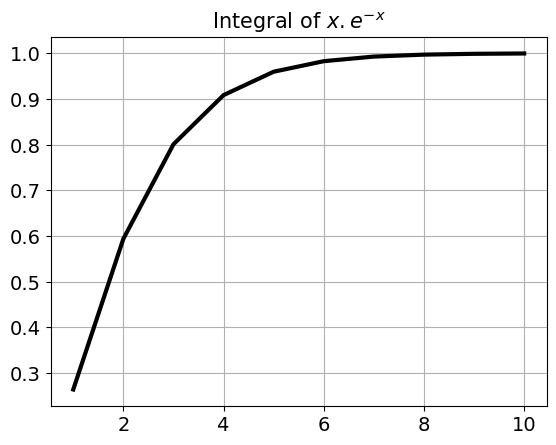

In [18]:
plt.plot(range(1,11),integral_value,color='k',lw=3)
plt.title("Integral of $x.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [19]:
def expectation(x):
    return x*func(x)

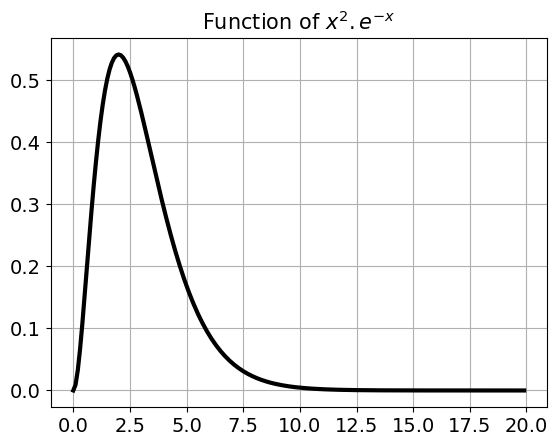

In [20]:
x = np.arange(0,20,0.1)
y = expectation(x)
plt.plot(x,y,color='k',lw=3)
plt.title("Function of $x^2.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [21]:
integral_value=[]
for i in range(1,11):
    integral=scipy.integrate.quad(expectation,0,i)[0]
    integral_value.append(integral)
    print("The integral value for upper limit of {} is : {}".format(i,integral))

The integral value for upper limit of 1 is : 0.16060279414278839
The integral value for upper limit of 2 is : 0.6466471676338732
The integral value for upper limit of 3 is : 1.1536198377463132
The integral value for upper limit of 4 is : 1.5237933888929112
The integral value for upper limit of 5 is : 1.7506959610338377
The integral value for upper limit of 6 is : 1.8760623911666823
The integral value for upper limit of 7 is : 1.9407276722389566
The integral value for upper limit of 8 is : 1.972492064511994
The integral value for upper limit of 9 is : 1.9875356097872454
The integral value for upper limit of 10 is : 1.9944612085689766


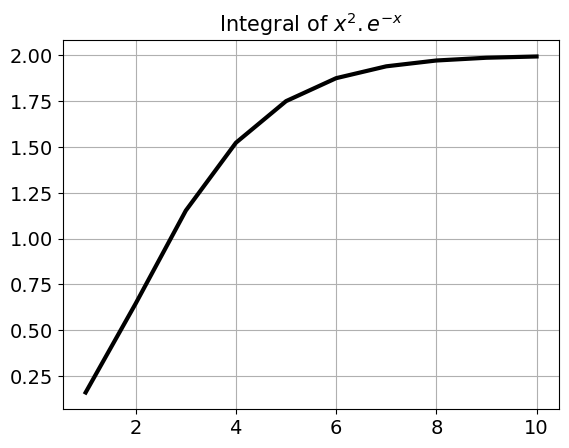

In [22]:
plt.plot(range(1,11),integral_value,color='k',lw=3)
plt.title("Integral of $x^2.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

---

## Discrete and Continuous Distributions

Probability distributions are generally divided into two classes. A __discrete probability distribution__ (applicable to the scenarios where the set of possible outcomes is discrete, such as a coin toss or a roll of dice) can be encoded by a discrete list of the probabilities of the outcomes, known as a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function). 

On the other hand, a __continuous probability distribution__ (applicable to the scenarios where the set of possible outcomes can take on values in a continuous range (e.g. real numbers), such as the temperature on a given day) is typically described by probability density functions (with the probability of any individual outcome actually being 0). Such distributions are generally described with the help of [probability density functions](https://en.wikipedia.org/wiki/Probability_density_function).

### Some Essential Terminologies

* __Mode__: for a discrete random variable, the value with highest probability (the location at which the probability mass function has its peak); for a continuous random variable, a location at which the probability density function has a local peak.
* __Support__: the smallest closed set whose complement has probability zero.
* __Head__: the range of values where the pmf or pdf is relatively high.
* __Tail__: the complement of the head within the support; the large set of values where the pmf or pdf is relatively low.
* __Expected value or mean__: the weighted average of the possible values, using their probabilities as their weights; or the continuous analog thereof.
* __Median__: the value such that the set of values less than the median, and the set greater than the median, each have probabilities no greater than one-half.
* __Variance__: the second moment of the pmf or pdf about the mean; an important measure of the dispersion of the distribution.
* __Standard deviation__: the square root of the variance, and hence another measure of dispersion.

* __Symmetry__: a property of some distributions in which the portion of the distribution to the left of a specific value is a mirror image of the portion to its right.
* __Skewness__: a measure of the extent to which a pmf or pdf "leans" to one side of its mean. The third standardized moment of the distribution.
* __Kurtosis__: a measure of the "fatness" of the tails of a pmf or pdf. The fourth standardized moment of the distribution.

![kurtosis](https://anotherbloodybullshitblog.files.wordpress.com/2016/01/normal-not-always-the-norm.gif?w=809)

### Quick mathematical definitions of mean, variance, skewness, and kurtosis with respect to a PDF $P(x)$

$$\text{1st raw moment } \mathbf{Mean\ (1st\ moment):} \int x.P(x).dx$$

$$\text{Centralized 2nd moment } \mathbf{Variance\ (2nd\ moment):} \int (x-\mu)^2.P(x).dx$$

$$\text{Pearson's 3rd moment (Standardized) }\mathbf{Skew\ (3rd\ moment):} \int\left ( \frac{x-\mu}{\sigma} \right )^3.P(x).dx$$

$$\text{Pearson's 4th moment (Standardized)  }\mathbf{Kurtosis\ (4th\ moment):} \int\left ( \frac{x-\mu}{\sigma} \right )^4.P(x).dx$$

---

## Bernoulii distribution

The Bernoulli distribution, named after Swiss mathematician [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli), is the probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 − p$ — i.e., the probability distribution of any single experiment that asks a ___yes–no question___; the question results in a boolean-valued outcome, a single bit of information whose value is success/yes/true/one with probability $p$ and failure/no/false/zero with probability $q$. 

It can be used to represent a coin toss where 1 and 0 would represent "head" and "tail" (or vice versa), respectively. In particular, unfair coins would have $p ≠ 0.5$.

![coin](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/coin_toss.PNG)

The probability mass function $f$ of this distribution, over possible outcomes $k$, is

$${\displaystyle f(k;p)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}}$$

In [24]:
from scipy.stats import bernoulli

### Generate random variates

In [25]:
# p=0.5 i.e. fair coin
bernoulli.rvs(p=0.5,size=10)

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

### Loaded coin towards tail, p=0.2 for head

In [26]:
# p=0.2 i.e. more tails (0) than heads(1)
bernoulli.rvs(p=0.2,size=20)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

### Loaded coin towards head, p=0.8 for head

In [27]:
# p=0.8 i.e. more heads (1) than tails (0)
bernoulli.rvs(p=0.8,size=20)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

### Note, a single run or even a small number of runs may not produce the expected distribution of 1's and 0's. 
For example, if you assign $p=0.5$, you may not get half 1's and half 0's every time you evaluate the function. Experiment with $N$ number of trials to see how the probability distribution gradually centers around 0.5.

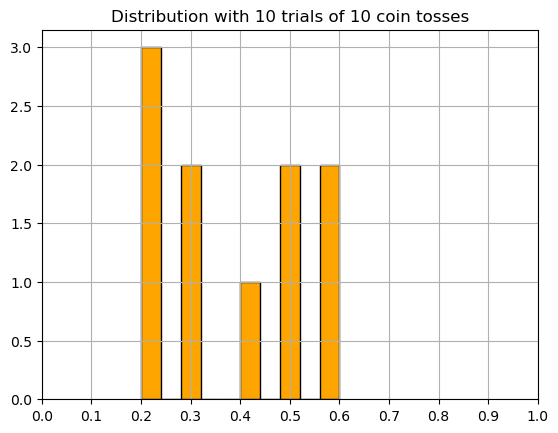

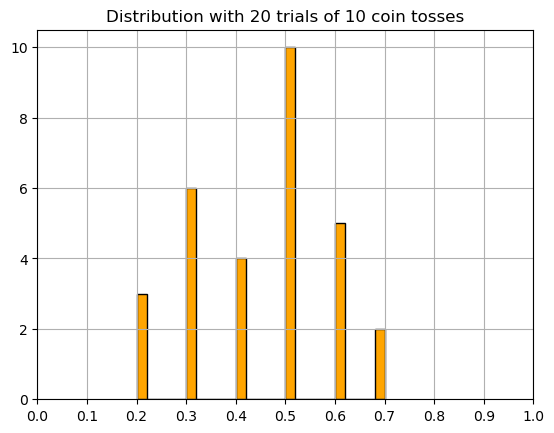

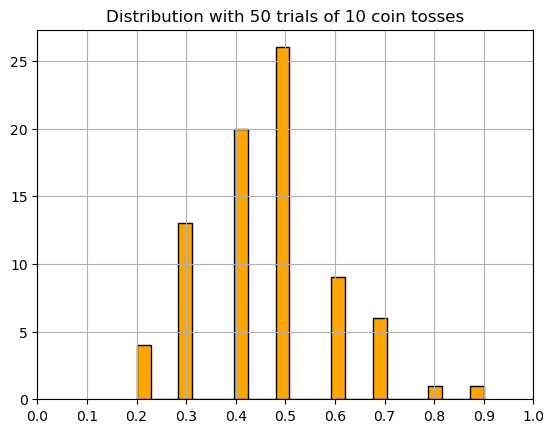

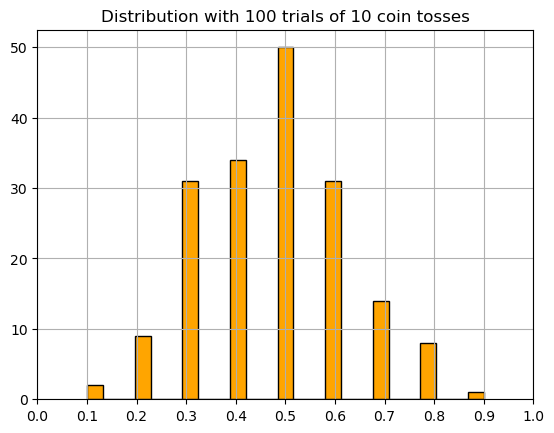

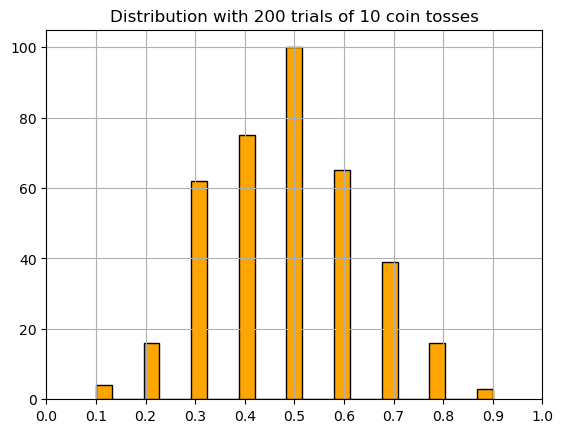

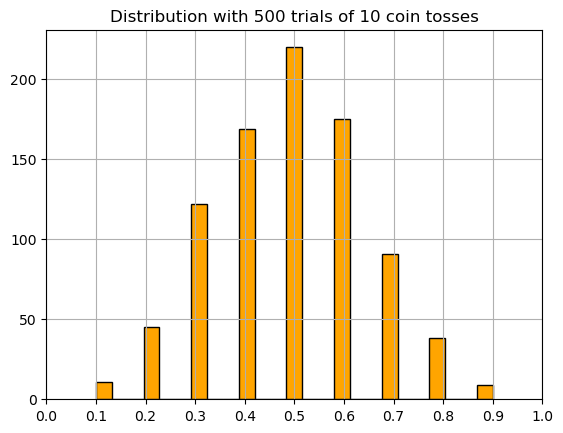

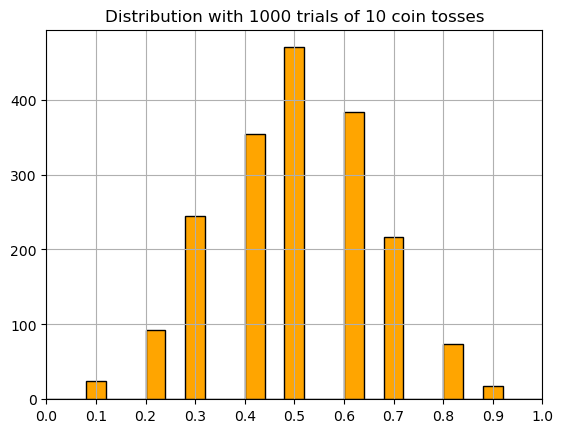

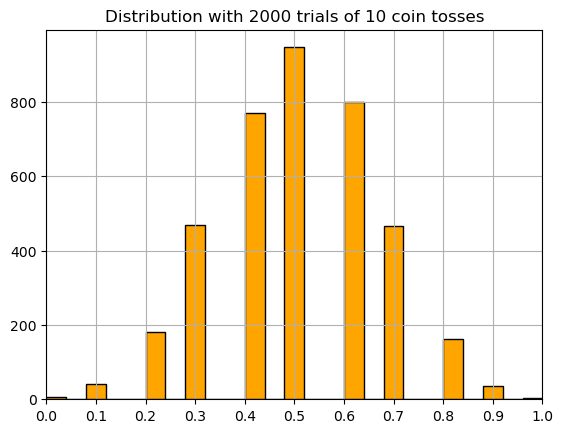

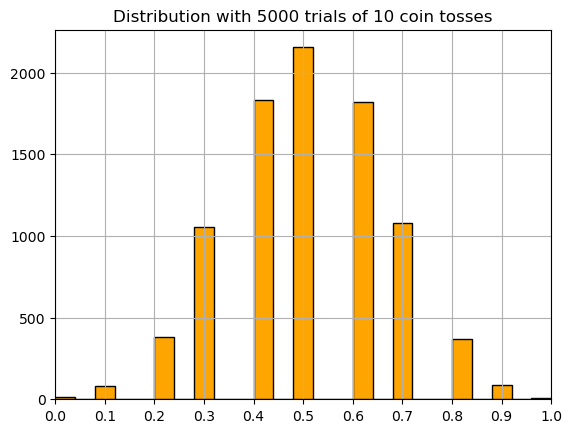

In [28]:
N_trials = [10,20,50,100,200,500,1000,2000,5000] # Number of trials
pr=0.5 # Fair coin toss probability
av = [] # Empty list to store the average of the random variates

# Generate 10 variates every time and take the average. That should be # of 1's i.e. 0.5 for a fair coin.
for i in N_trials:
    for n in range(1,i+1):
        av.append(np.mean(bernoulli.rvs(p=pr,size=10)))
    if (i==10):
        plt.title("Distribution with {} trials of 10 coin tosses".format(i))
        plt.hist(av,bins=10,edgecolor='k',color='orange')
        plt.xlim(0.0,1.0)
        plt.xticks([0.1*i for i in range(11)])
        plt.grid(True)
        plt.show()
    else:
        plt.title("Distribution with {} trials of 10 coin tosses".format(i))
        plt.hist(av,bins=25,edgecolor='k',color='orange')
        plt.xlim(0.0,1.0)
        plt.xticks([0.1*i for i in range(11)])
        plt.grid(True)
        plt.show()

### Mean, variance, skew, and kurtosis
Use `bernoulli.stats()` method

In [29]:
print("A fair coin is spinning...\n"+"-"*30)
pr=0.5 # Fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

A fair coin is spinning...
------------------------------
Mean: 0.5
Variance: 0.25
Skew: 0.0
Kurtosis: -2.0


In [30]:
print("\nNow a biased coin is spinning...\n"+"-"*35)
pr=0.7 # Biased coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)


Now a biased coin is spinning...
-----------------------------------
Mean: 0.7
Variance: 0.21000000000000002
Skew: -0.8728715609439702
Kurtosis: -1.2380952380952361


### Probability mass function (PMF) and cumulative distribution function (CDF)

In [31]:
rv = bernoulli(0.6)
x=0
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=0.5
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=1.0
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=1.2
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))

Probability mass function for 0: 0.4
Probability mass function for 0.5: 0.623757440986941
Probability mass function for 1.0: 0.6
Probability mass function for 1.2: 0.0


In [32]:
print("CDF for x < 0:",rv.cdf(-2))
print("CDF for 0< x <1:",rv.cdf(0.75))
print("CDF for x >1:",rv.cdf(2))

CDF for x < 0: 0.0
CDF for 0< x <1: 0.4
CDF for x >1: 1.0


---

## Binomial distribution

The binomial distribution with parameters $n$ and $p$ is the discrete probability distribution of the **number of successes in a sequence of $n$ independent experiments, each asking a _yes–no question_,** and each with its own boolean-valued outcome: a random variable containing single bit of information: success/yes/true/one (with probability $p$) or failure/no/false/zero (with probability $q = 1 − p$). A single success/failure experiment is also called a _Bernoulli trial_ or _Bernoulli experiment_ and a sequence of outcomes is called a _Bernoulli process_. 

For a single trial, i.e., n = 1, the binomial distribution is a **Bernoulli distribution**. The binomial distribution is the basis for the popular [binomial test](https://en.wikipedia.org/wiki/Binomial_test) of [statistical significance](https://en.wikipedia.org/wiki/Statistical_significance).

The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. If the sampling is carried out without replacement, the draws are not independent and so the resulting distribution is a __[hypergeometric distribution](https://en.wikipedia.org/wiki/Hypergeometric_distribution)__, not a binomial one. However, for N much larger than n, the binomial distribution remains a good approximation, and is widely used.

In general, if the random variable $X$ follows the binomial distribution with parameters n ∈ ℕ and p ∈ [0,1], we write X ~ B(n, p). The probability of getting exactly $k$ successes in $n$ trials is given by the probability mass function:

$${\Pr(k;n,p)=\Pr(X=k)={n \choose k}p^{k}(1-p)^{n-k}}$$

for k = 0, 1, 2, ..., n, where

$${\displaystyle {\binom {n}{k}}={\frac {n!}{k!(n-k)!}}}$$

![head_tail](https://wp-media.patheos.com/blogs/sites/308/2018/03/Probability-Tree-Diagram-coin-toss-1.jpg)

### Generate random variates
8 coins are flipped (or 1 coin is flipped 8 times), each with probability of success (1) of 0.25. This trial/experiment is repeated for 10 times.

In [33]:
from scipy.stats import binom

In [34]:
k=binom.rvs(8,0.25,size=10)
print("Number of success for each trial:",k)
print("Average of the success:", np.mean(k))

Number of success for each trial: [2 2 2 2 5 3 1 0 3 2]
Average of the success: 2.2


### Mean, variance, skew, and kurtosis

$$\textbf{Mean} = n.p,\ \textbf{Variance}= n.p(1 - p), \textbf{skewness}= \frac{1-2p}{\sqrt{n.p(1-p)}}, \ \textbf{kurtosis}= \frac{1-6p(1-p)}{n.p(1-p)}$$

Use `binom.stats()` method

In [35]:
print("A fair coin (p=0.5) is spinning 5 times\n"+"-"*35)
pr=0.5 # Fair coin toss probability
n=5
mean, var, skew, kurt = binom.stats(n=n,p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

A fair coin (p=0.5) is spinning 5 times
-----------------------------------
Mean: 2.5
Variance: 1.25
Skew: 0.0
Kurtosis: -0.4


In [36]:
print("\nNow a biased coin (p=0.7) is spinning 5 times...\n"+"-"*45)
pr=0.7 # Biased coin toss probability
n=5
mean, var, skew, kurt = binom.stats(n=n,p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)


Now a biased coin (p=0.7) is spinning 5 times...
---------------------------------------------
Mean: 3.5
Variance: 1.0500000000000003
Skew: -0.39036002917941315
Kurtosis: -0.24761904761904757


### Visualizing probability mass function (PMF)

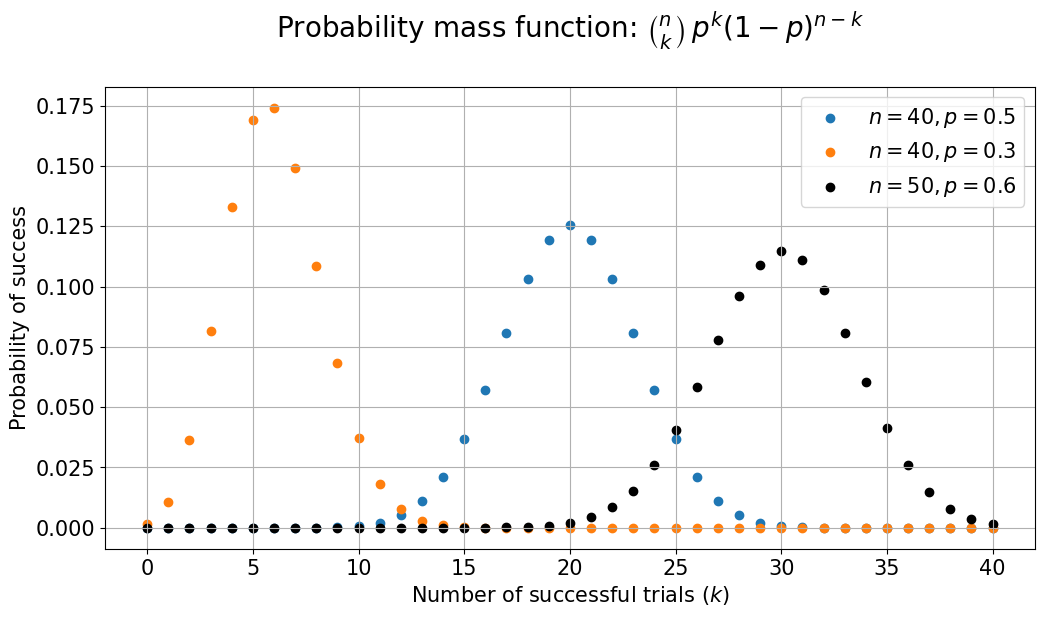

In [37]:
n=40
pr=0.5
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf1 = rv.pmf(x)

n=40
pr=0.15
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf2 = rv.pmf(x)

n=50
pr=0.6
rv = binom(n,pr)
x=np.arange(0,41,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(12,6))
plt.title("Probability mass function: $\\binom{n}{k}\, p^k (1-p)^{n-k}$\n",fontsize=20)
plt.scatter(x,pmf1)
plt.scatter(x,pmf2)
plt.scatter(x,pmf3,c='k')
plt.legend(["$n=40, p=0.5$","$n=40, p=0.3$","$n=50, p=0.6$"],fontsize=15)
plt.xlabel("Number of successful trials ($k$)",fontsize=15)
plt.ylabel("Probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

### Visualize the cumulative distrubition function (cdf)

Cumulative distribution function for binomial distribution can also be represented in terms of the [regularized incomplete beta function](https://en.wikipedia.org/wiki/Regularized_incomplete_beta_function), as follows

$${\displaystyle {\begin{aligned}F(k;n,p)&=\Pr(X\leq k)\\&=I_{1-p}(n-k,k+1)\\&=(n-k){n \choose k}\int _{0}^{1-p}t^{n-k-1}(1-t)^{k}\,dt.\end{aligned}}}$$

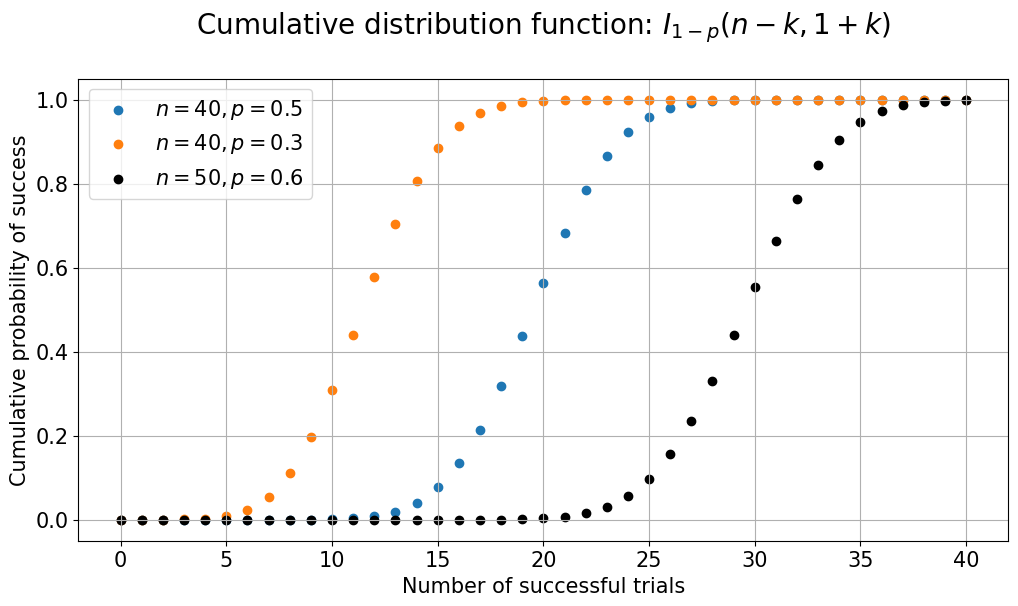

In [38]:
n=40
pr=0.5
rv = binom(n,pr)
x=np.arange(0,41,1)
cdf1 = rv.cdf(x)

n=40
pr=0.3
rv = binom(n,pr)
x=np.arange(0,41,1)
cdf2 = rv.cdf(x)

n=50
pr=0.6
rv = binom(n,pr)
x=np.arange(0,41,1)
cdf3 = rv.cdf(x)

plt.figure(figsize=(12,6))
plt.title("Cumulative distribution function: $I_{1-p}(n - k, 1 + k)$\n",fontsize=20)
plt.scatter(x,cdf1)
plt.scatter(x,cdf2)
plt.scatter(x,cdf3,c='k')
plt.legend(["$n=40, p=0.5$","$n=40, p=0.3$","$n=50, p=0.6$"],fontsize=15)
plt.xlabel("Number of successful trials",fontsize=15)
plt.ylabel("Cumulative probability of success",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

### Interval that contains a specific percentage of distribution
Use `binom.interval` method

In [39]:
n=40
pr=0.3
percent=25
interval = binom.interval(percent/100,n,pr,loc=0)
print("Interval that contains {} percent of distribution with an experiment with {} trials and {} success probability  is: {}"
      .format(percent,n,pr,interval))

Interval that contains 25 percent of distribution with an experiment with 40 trials and 0.3 success probability  is: (11.0, 13.0)


---

## Poisson Distribution

The Poisson distribution (named after French mathematician Siméon Denis Poisson), is a discrete probability distribution that **expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant rate and independently of the time since the last event.** The Poisson distribution can also be used for the number of events in other specified intervals such as distance, area or volume.

For instance, an individual keeping track of the amount of mail they receive each day may notice that they receive an average number of 4 letters per day. If receiving any particular piece of mail does not affect the arrival times of future pieces of mail, i.e., if pieces of mail from a wide range of sources arrive independently of one another, then a reasonable assumption is that the number of pieces of mail received in a day obeys a Poisson distribution. Other examples, that may follow a Poisson distribution, include

* number of phone calls received by a call center per hour 
* number of decay events per second from a radioactive source
* The number of meteors greater than 1 meter diameter that strike Earth in a year
* The number of patients arriving in an emergency room between 10 and 11 pm

**Poisson distribution is a limiting case of a Binomial Distribution where the number of trials is sufficiently bigger than the number of successes one is asking about i.e. $n>>1>>p$**

An event can occur 0, 1, 2, … times in an interval. The average number of events in an interval is designated $\lambda$. This is the event rate, also called the rate parameter. The probability of observing k events in an interval is given by the equation

${P(k{\text{ events in interval}})=e^{-\lambda }{\frac {\lambda ^{k}}{k!}}}$

where,

${\lambda}$ is the average number of events per interval

e is the number 2.71828... (Euler's number) the base of the natural logarithms

k takes values 0, 1, 2, …
k! = k × (k − 1) × (k − 2) × … × 2 × 1 is the factorial of k.

In [40]:
from scipy.stats import poisson

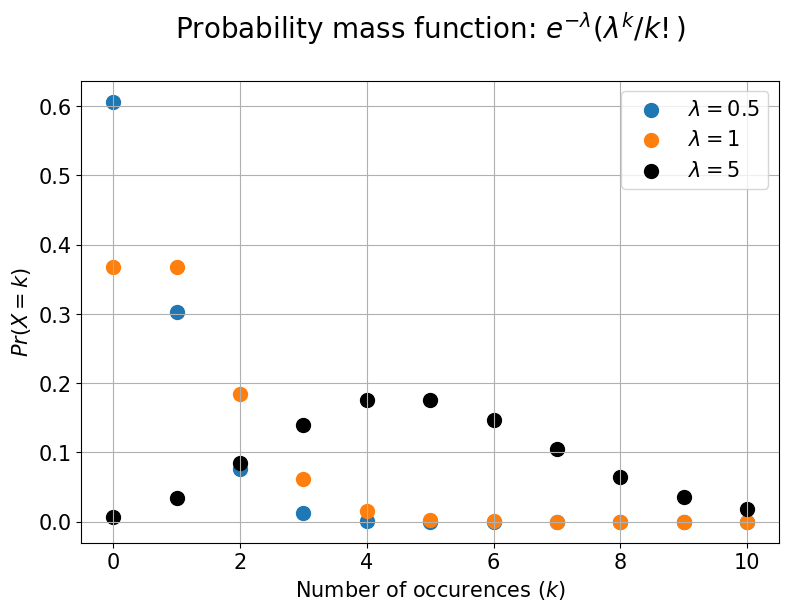

In [41]:
la=0.5
rv = poisson(la)
x=np.arange(0,11,1)
pmf1 = rv.pmf(x)

la=1
rv = poisson(la)
x=np.arange(0,11,1)
pmf2 = rv.pmf(x)

la=5
rv = poisson(la)
x=np.arange(0,11,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(9,6))
plt.title("Probability mass function: $e^{-\lambda}{(\lambda^k/k!)}$\n",fontsize=20)
plt.scatter(x,pmf1,s=100)
plt.scatter(x,pmf2,s=100)
plt.scatter(x,pmf3,c='k',s=100)
plt.legend(["$\lambda=0.5$","$\lambda=1$","$\lambda=5$"],fontsize=15)
plt.xlabel("Number of occurences ($k$)",fontsize=15)
plt.ylabel("$Pr(X=k)$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

### Visualizing the cumulative distribution function

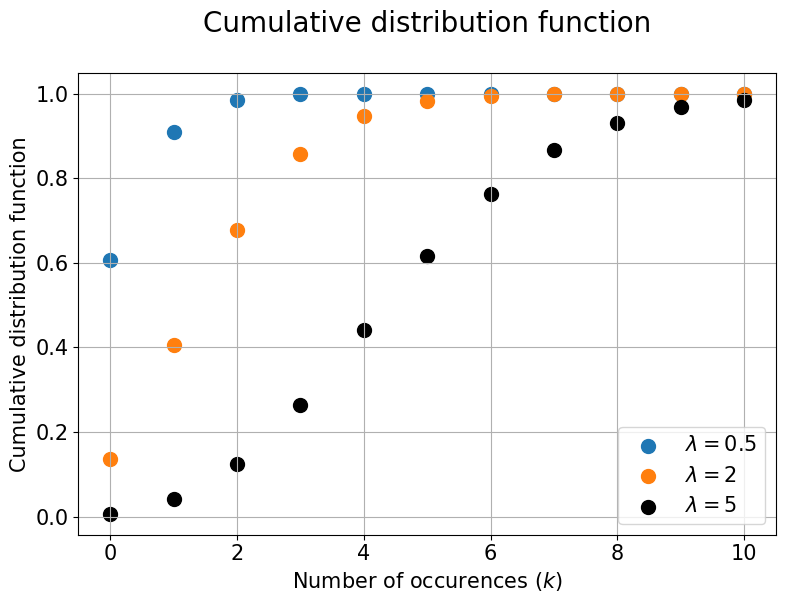

In [42]:
la=0.5
rv = poisson(la)
x=np.arange(0,11,1)
cdf1 = rv.cdf(x)

la=2
rv = poisson(la)
x=np.arange(0,11,1)
cdf2 = rv.cdf(x)

la=5
rv = poisson(la)
x=np.arange(0,11,1)
cdf3 = rv.cdf(x)

plt.figure(figsize=(9,6))
plt.title("Cumulative distribution function\n",fontsize=20)
plt.scatter(x,cdf1,s=100)
plt.scatter(x,cdf2,s=100)
plt.scatter(x,cdf3,c='k',s=100)
plt.legend(["$\lambda=0.5$","$\lambda=2$","$\lambda=5$"],fontsize=15)
plt.xlabel("Number of occurences ($k$)",fontsize=15)
plt.ylabel("Cumulative distribution function",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

### Moments - mean, variance, skew, and kurtosis
Various moments of a Poisson distributed random variable $X$ are as follows:

$$ \textbf{Mean}=\lambda,\ \textbf{Variance}=\lambda,\ \textbf{skewness}=\frac {1}{\sqrt{\lambda}},\ \textbf{kurtosis}=\frac{1}{\lambda}$$

---

## Geometric distribution

The geometric distribution is either of two discrete probability distributions:
- The probability distribution of the number X of Bernoulli trials needed to get one success, supported on the set { 1, 2, 3, ...}
- The probability distribution of the number Y = X − 1 of failures before the first success, supported on the set { 0, 1, 2, 3, ... }

Which of these one calls "the" geometric distribution is a matter of convention and convenience.

These two different geometric distributions should not be confused with each other. Often, the name shifted geometric distribution is adopted for the former one (distribution of the number $X$); however, to avoid ambiguity, it is considered wise to indicate which is intended, by mentioning the support explicitly.

The geometric distribution gives the probability that the first occurrence of success requires $k$ independent trials, each with success probability $p$. If the probability of success on each trial is $p$, then the probability that the $k^{th}$ trial (out of $k$ trials) is the first success is

${\Pr(X=k)=(1-p)^{k-1}\,p\,}$

for $k = 1, 2, 3, ....$

The above form of the geometric distribution is used for modeling the number of trials up to and including the first success. By contrast, the following form of the geometric distribution is used for modeling the number of failures until the first success:

${\Pr(Y=k)=(1-p)^{k}\,p\,}$

for $k = 0, 1, 2, 3, ....$

In either case, the sequence of probabilities is a geometric sequence.

The geometric distribution is an appropriate model if the following assumptions are true.
- The phenomenon being modelled is a sequence of independent trials.
- There are only two possible outcomes for each trial, often designated success or failure.
- The probability of success, p, is the same for every trial.

In [43]:
from scipy.stats import geom

### Generate random variates
It is difficult to get a success with low probability, so it takes more trials

In [44]:
r=geom.rvs(p=0.1,size=10)
print(r)

[2 3 9 7 8 5 1 5 8 7]


It is easier to get the first success with higher probability, so it takes less number of trials

In [45]:
r=geom.rvs(p=0.5,size=10)
print(r)

[ 1  2  1 12  3  3  1  1  1  2]


### Visualizing probability mass function (PMF)

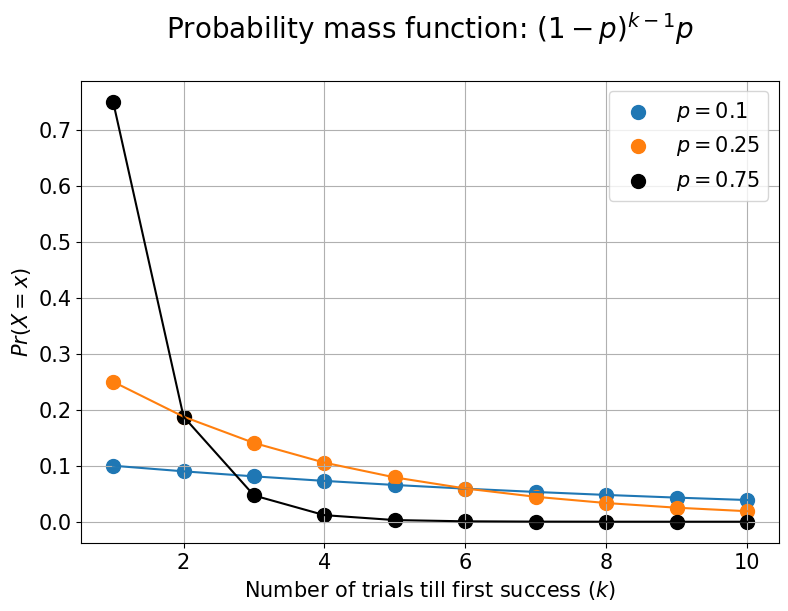

In [46]:
p=0.1
rv = geom(p)
x=np.arange(1,11,1)
pmf1 = rv.pmf(x)

p=0.25
rv = geom(p)
x=np.arange(1,11,1)
pmf2 = rv.pmf(x)

p=0.75
rv = geom(p)
x=np.arange(1,11,1)
pmf3 = rv.pmf(x)

plt.figure(figsize=(9,6))
plt.title("Probability mass function: $(1-p)^{k-1}p$\n",fontsize=20)
plt.scatter(x,pmf1,s=100)
plt.scatter(x,pmf2,s=100)
plt.scatter(x,pmf3,c='k',s=100)
plt.plot(x,pmf1)
plt.plot(x,pmf2)
plt.plot(x,pmf3,c='k')
plt.legend(["$p=0.1$","$p=0.25$","$p=0.75$"],fontsize=15)
plt.xlabel("Number of trials till first success ($k$)",fontsize=15)
plt.ylabel("$Pr(X=x)$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

### Visualizing cumulative distribution function

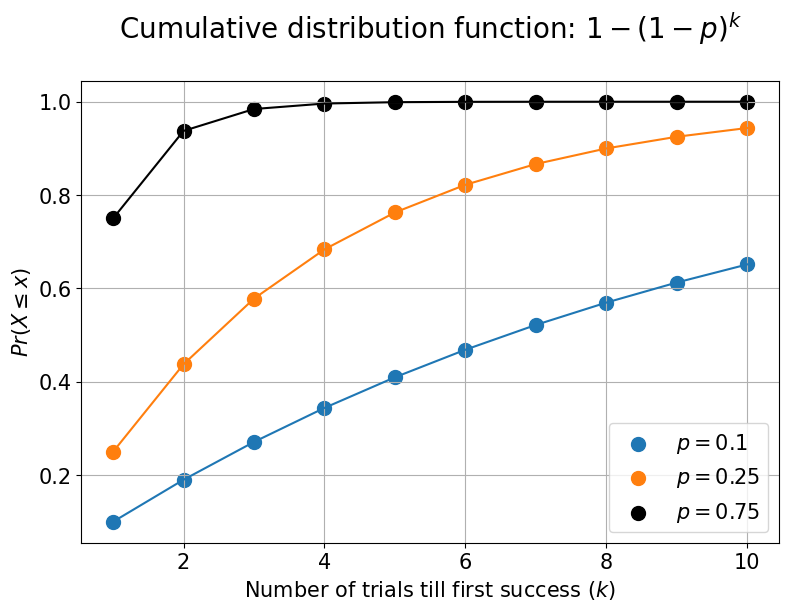

In [47]:
p=0.1
rv = geom(p)
x=np.arange(1,11,1)
cdf1 = rv.cdf(x)

p=0.25
rv = geom(p)
x=np.arange(1,11,1)
cdf2 = rv.cdf(x)

p=0.75
rv = geom(p)
x=np.arange(1,11,1)
cdf3 = rv.cdf(x)

plt.figure(figsize=(9,6))
plt.title("Cumulative distribution function: $1-(1-p)^k$\n",fontsize=20)
plt.scatter(x,cdf1,s=100)
plt.scatter(x,cdf2,s=100)
plt.scatter(x,cdf3,c='k',s=100)
plt.plot(x,cdf1)
plt.plot(x,cdf2)
plt.plot(x,cdf3,c='k')
plt.legend(["$p=0.1$","$p=0.25$","$p=0.75$"],fontsize=15)
plt.xlabel("Number of trials till first success ($k$)",fontsize=15)
plt.ylabel("$Pr(X\leq x)$",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.show()

### Expected value (mean), variance, skewness, kurtosis
Various moments of a geometrically distributed random variable $X$ are as follows:

$$ \textbf{Mean}=\frac {1}{p},\ \textbf{Variance}=\frac {1-p}{p^2},\ \textbf{skewness}=\frac {2-p}{\sqrt{1-p}},\ \textbf{kurtosis}=6+\frac{p^2}{1-p}$$

---

## Uniform (continuous) distribution

This is the distribution of the likelihood of uniformly randomly selecting an item out of a finite collection.

We are mostly familiar with the discontinuous version of this distribution. For example, in case of throwing a fair dice, the probability distribution of a single throw is given by: 

$$ \left \{ \frac{1}{6},\ \frac{1}{6}, \ \frac{1}{6},\ \frac{1}{6},\ \frac{1}{6},\ \frac{1}{6} \right \} $$

![dice](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/dice.PNG)

For the continuous case, the PDF looks deceptively simple, but the concept is subtle,

$$ f(x)={\begin{cases}{\frac {1}{b-a}}&\mathrm {for} \ a\leq x\leq b,\\[8pt]0&\mathrm {for} \ x<a\ \mathrm {or} \ x>b\end{cases}} $$

![uniform](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/uniform_dist.PNG)

In [48]:
from scipy.stats import uniform

### Generate random variates (default between 0 and 1)

In [49]:
uniform.rvs(size=5)

array([0.58550134, 0.46143686, 0.75138805, 0.28810473, 0.86801741])

### Change the `loc` and `scale` parameters to move the range

In [50]:
# Random floats between -10 and 0
uniform.rvs(loc=-10,scale=10,size=5)

array([-9.18982516, -8.75164868, -0.51976265, -3.48456205, -8.80920794])

In [51]:
# Random floats between -10 and +10
uniform.rvs(loc=-10,scale=20,size=5)

array([-1.5120379 ,  4.37012038, -9.29401657, -2.2445805 , -0.0232347 ])

---

## Normal (Gaussian) distribution

In probability theory, the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. A random variable with a Gaussian distribution is said to be normally distributed and is called a normal deviate.

The normal distribution is useful because of the **[central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)**. In its most general form, under some conditions (which include finite variance), it states that **averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal**, that is, they become normally distributed when the number of observations is sufficiently large. 

Physical quantities that are expected to be the sum of many independent processes (such as measurement errors) often have distributions that are nearly normal. Moreover, many results and methods (such as propagation of uncertainty and least squares parameter fitting) can be derived analytically in explicit form when the relevant variables are normally distributed.

### PDF and CDF

The probability density function (PDF) is given by,
$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}} $$
where,
- $\mu$ is the mean or expectation of the distribution (and also its median and mode),
- $\sigma$ is the standard deviation, and $\sigma^2$ is the variance.

Cumulative distribution function (CDF) is given by,
$$\frac{1}{2}\left [ 1+\text{erf} \left ( \frac{x-\mu}{\sigma\sqrt{2}}\right ) \right ]$$

![normal](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/normal.PNG)

Scipy Stats page: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

In [52]:
from scipy.stats import norm

Text(0, 0.5, 'Probability Density')

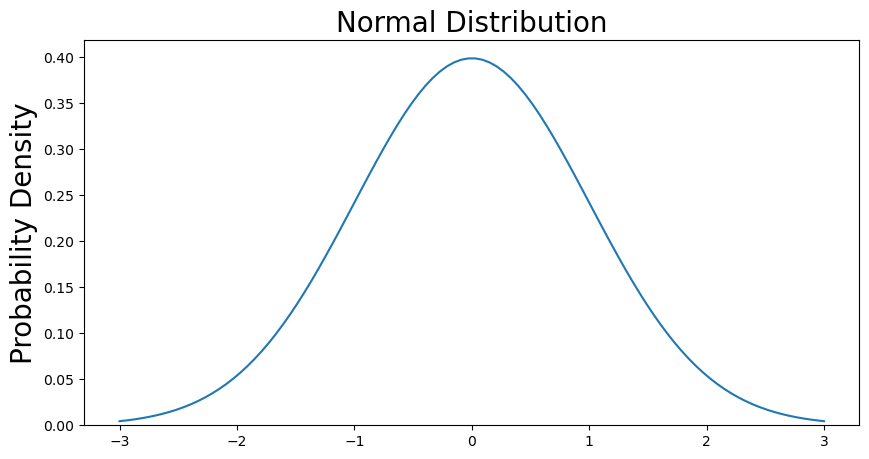

In [53]:
x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20)

### Derive the familiar 68-95-99.7 rule from the basic definition

In [54]:
def normalProbabilityDensity(x):
    constant = 1.0 / np.sqrt(2*np.pi)
    return(constant * np.exp((-x**2) / 2.0) )# Integrate PDF from -1 to 1

def integrate_normal(num_sigma):
    result, _ = scipy.integrate.quad(normalProbabilityDensity, -num_sigma, num_sigma, limit = 1000)
    return round(result,3)

In [55]:
print("The percentage of data present within 1 standard deviation:",integrate_normal(1))
print("The percentage of data present within 2 standard deviations:",integrate_normal(2))
print("The percentage of data present within 3 standard deviations:",integrate_normal(3))

The percentage of data present within 1 standard deviation: 0.683
The percentage of data present within 2 standard deviations: 0.954
The percentage of data present within 3 standard deviations: 0.997


## Random variable generation using `Numpy.random` module
Numpy offers an amazing module called `Numpy.random`, which has all the important probability distributions built-in for generation. We will check it out for,

- Normal
- Uniform
- Binomial
- Chi-square
- Poisson
- F-distribution and Student's t-distribution

### Generate normally distributed numbers with various mean and std.dev
In `numpy.random.normal` method, the `loc` argument is the mean, adnd the `scale` argument is the std.dev

In [56]:
a1 = np.random.normal(loc=0,scale=np.sqrt(0.2),size=100000)
a2 = np.random.normal(loc=0,scale=1.0,size=100000)
a3 = np.random.normal(loc=0,scale=np.sqrt(5),size=100000)
a4 = np.random.normal(loc=-2,scale=np.sqrt(0.5),size=100000)

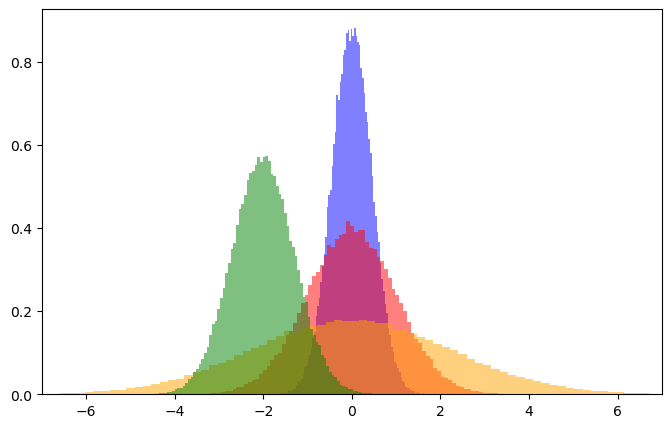

In [57]:
plt.figure(figsize=(8,5))
plt.hist(a1,density=True,bins=100,color='blue',alpha=0.5)
plt.hist(a2,density=True,bins=100,color='red',alpha=0.5)
plt.hist(a3,density=True,bins=100,color='orange',alpha=0.5)
plt.hist(a4,density=True,bins=100,color='green',alpha=0.5)
plt.xlim(-7,7)
plt.show()

### Generate dice throws and average them to show the emergence of Normality as per the Central Limit Theorem
We can use either `np.random.uniform` or `np.random.randint` to generate dice throws uniformly randomly

In [ ]:
np.random.uniform(low=1.0,high=7.0,size=10)

In [58]:
def dice_throws(num_sample):
    int_throws = np.vectorize(int)
    throws = int_throws(np.random.uniform(low=1.0,high=7.0,size=num_sample))
    return throws

In [59]:
dice_throws(5)

array([6, 1, 1, 4, 1])

In [60]:
np.random.randint(1,7,5)

array([5, 1, 4, 6, 1])

In [61]:
def average_throws(num_throws=5,num_experiment=100):
    averages = []
    for i in range(num_experiment):
        a = dice_throws(num_throws)
        av = a.mean()
        averages.append(av)
    return np.array(averages)

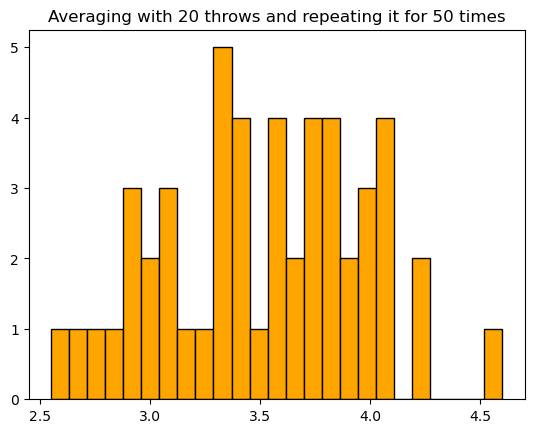

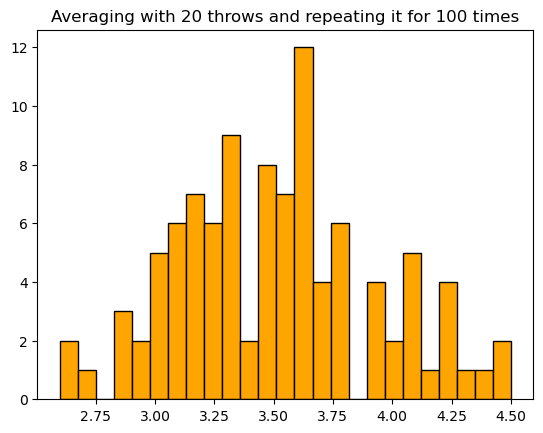

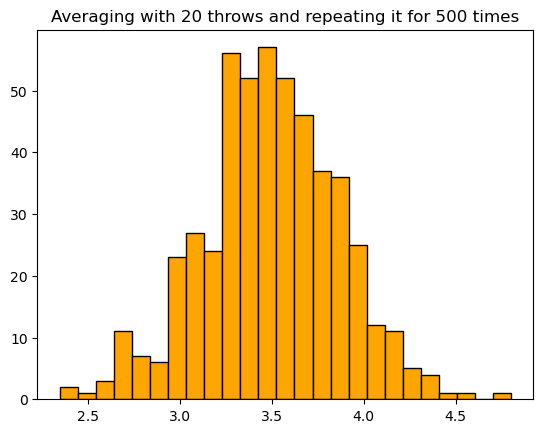

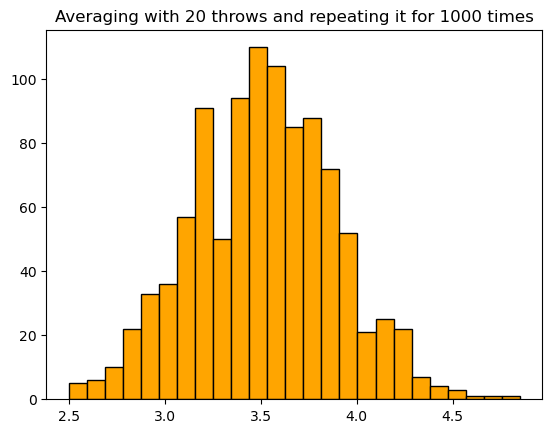

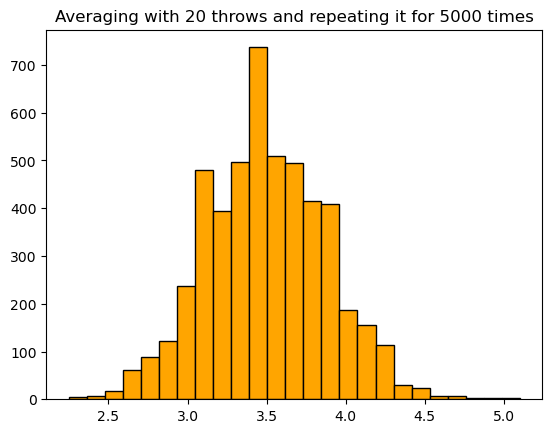

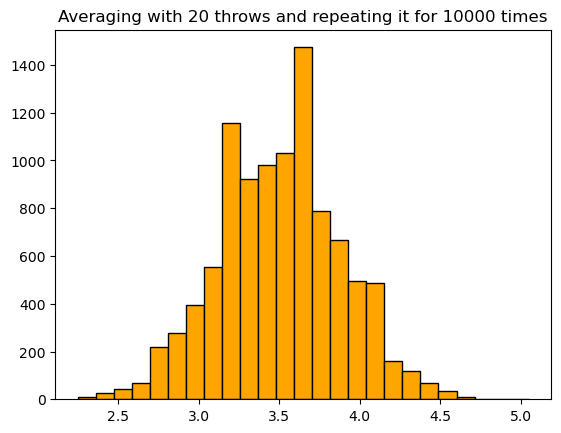

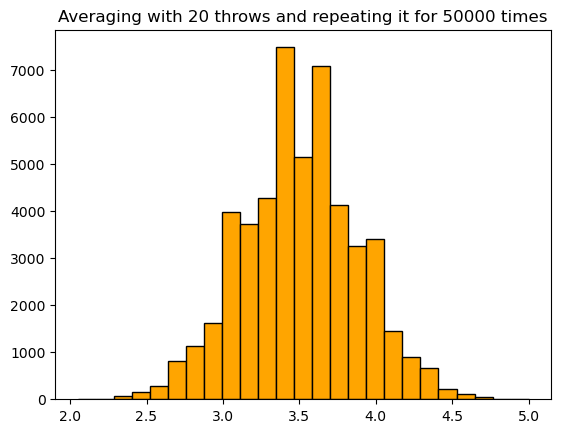

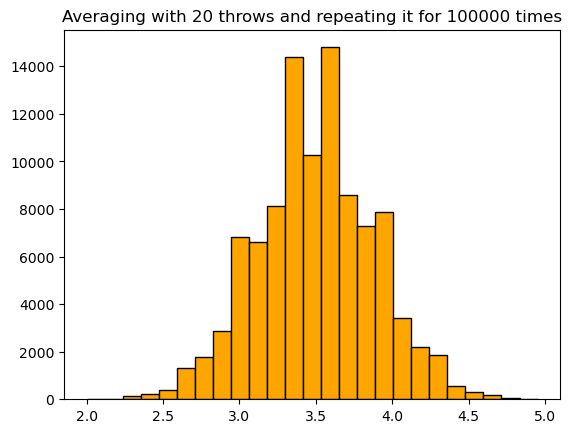

In [62]:
for i in [50,100,500,1000,5000,10000,50000,100000]:
    plt.hist(average_throws(num_throws=20,num_experiment=i),bins=25,edgecolor='k',color='orange')
    plt.title(f"Averaging with 20 throws and repeating it for {i} times")
    plt.show()

## Chi-square ($\chi^2$) distribution as a sum of squared Normally distributed variables

In probability theory and statistics, the **chi-square distribution (also chi-squared or χ2-distribution) with _k_ degrees of freedom is the distribution of a sum of the squares of _k_ independent standard normal random variables**. 

The chi-square distribution is a special case of the [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) and is one of the most widely used probability distributions in inferential statistics, notably in hypothesis testing or in construction of confidence intervals.

The probability density function (pdf) of the chi-square distribution is

$$ f(x;\,k)={\begin{cases}{\dfrac {x^{{\frac {k}{2}}-1}e^{-{\frac {x}{2}}}}{2^{\frac {k}{2}}\Gamma \left({\frac {k}{2}}\right)}},&x>0;\\0,&{\text{otherwise}}.\end{cases}} $$

where $\Gamma({k/2})$ denotes the gamma function, which has closed-form values for integer $k$. 

In [63]:
np.random.chisquare(df=3,size=10)

array([1.46361028, 1.65481594, 1.29652034, 6.57100425, 0.79448322,
       4.70062731, 1.63929752, 3.88997023, 3.05555735, 1.46292988])

In [64]:
def sum_normal(k,num_experiments=100):
    dist = []
    for i in range(num_experiments):
        total = 0
        for i in range(k):
            total+=(float(np.random.normal()))**2
        dist.append(total)
    return np.array(dist)

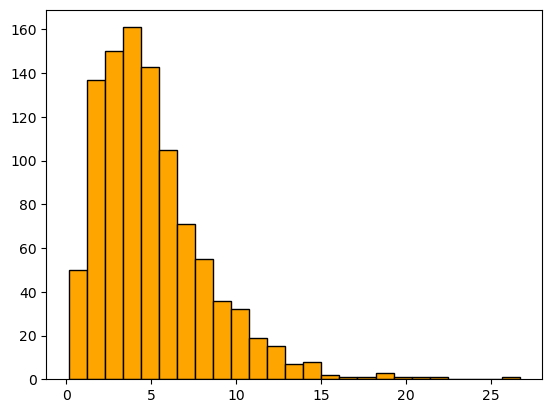

In [65]:
a1 = np.random.chisquare(df=5,size=1000)
plt.hist(a1,bins=25,edgecolor='k',color='orange')
plt.show()

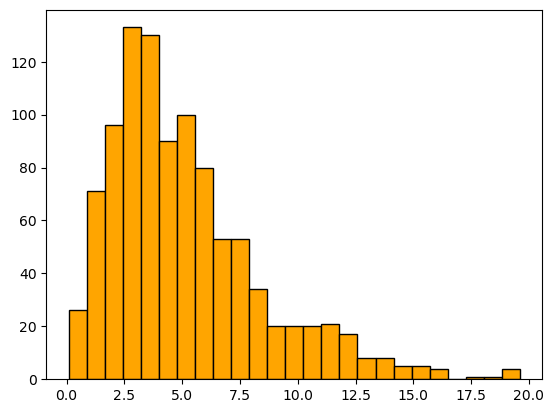

In [66]:
a2 = sum_normal(k=5,num_experiments=1000)
plt.hist(a2,bins=25,edgecolor='k',color='orange')
plt.show()

## F-distribution as a ratio of two scaled Chi-squared distributions
In probability theory and statistics, the F-distribution, also known as **Snedecor's F distribution** or the **Fisher–Snedecor distribution** (after [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) and [George W. Snedecor](https://en.wikipedia.org/wiki/George_W._Snedecor)) is a continuous probability distribution that arises frequently as the null distribution of a test statistic, most notably in the analysis of variance (ANOVA), e.g., F-test.

Then the probability density function (pdf) for X is given by

$$ {\begin{aligned}f(x;d_{1},d_{2})&={\frac {\sqrt {\frac {(d_{1}\,x)^{d_{1}}\,\,d_{2}^{d_{2}}}{(d_{1}\,x+d_{2})^{d_{1}+d_{2}}}}}{x\,\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\\&={\frac {1}{\mathrm {B} \!\left({\frac {d_{1}}{2}},{\frac {d_{2}}{2}}\right)}}\left({\frac {d_{1}}{d_{2}}}\right)^{\frac {d_{1}}{2}}x^{{\frac {d_{1}}{2}}-1}\left(1+{\frac {d_{1}}{d_{2}}}\,x\right)^{-{\frac {d_{1}+d_{2}}{2}}}\end{aligned}} $$

Here $\mathrm {B}$ is the beta function. In many applications, the parameters $d_1$ and $d_2$ are positive integers, but the distribution is well-defined for positive real values of these parameters.

In [67]:
np.random.f(dfnum=5,dfden=25,size=10)

array([0.47739078, 0.45255959, 1.78641968, 0.15983927, 1.12560384,
       0.8209127 , 0.80928405, 0.93042566, 0.75084994, 1.96573871])

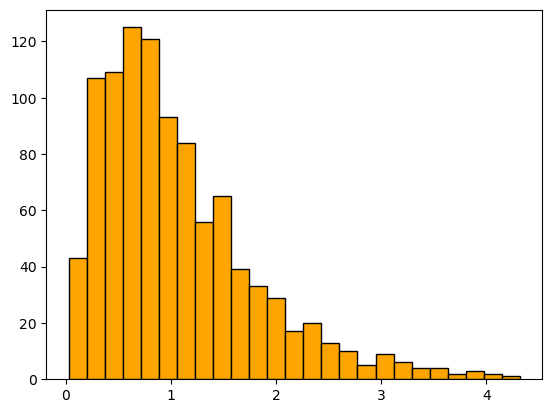

In [68]:
a1 = np.random.f(dfnum=5,dfden=25,size=1000)
plt.hist(a1,bins=25,edgecolor='k',color='orange')
plt.show()

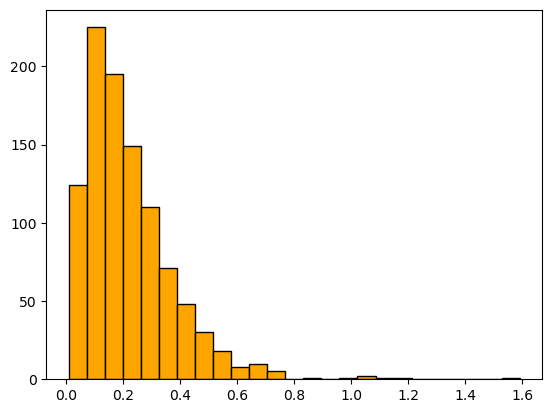

In [69]:
a2 = sum_normal(k=5,num_experiments=1000)
a3 = sum_normal(k=25,num_experiments=1000)
a4 = a2/a3

plt.hist(a4,bins=25,edgecolor='k',color='orange')
plt.show()

## Student's t-distribution

In probability and statistics, Student's t-distribution (or simply the t-distribution) is any member of a family of continuous probability distributions that arises when **estimating the mean of a normally distributed population in situations where the sample size is small and population standard deviation is unknown**. It was developed by [William Sealy Gosset](https://en.wikipedia.org/wiki/William_Sealy_Gosset) under the pseudonym Student.

The t-distribution plays a role in a number of widely used statistical analyses, including Student's t-test for assessing the statistical significance of the difference between two sample means, the construction of confidence intervals for the difference between two population means, and in linear regression analysis. The Student's t-distribution also arises in the Bayesian analysis of data from a normal family.

Student's t-distribution has the probability density function given by,
$$ f(t)={\frac {\Gamma ({\frac {\nu +1}{2}})}{{\sqrt {\nu \pi }}\,\Gamma ({\frac {\nu }{2}})}}\left(1+{\frac {t^{2}}{\nu }}\right)^{\!-{\frac {\nu +1}{2}},\!} $$

where $\nu$ is the number of degrees of freedom and $\Gamma$ is the gamma function. 

![t_dist_538](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/t_dist_538.PNG)

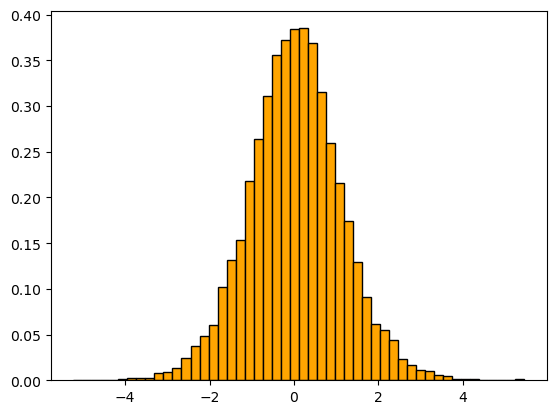

In [70]:
a1=np.random.standard_t(10,size=10000)
plt.hist(a1,bins=50,edgecolor='k',color='orange',density=True)
plt.show()